Importing packages

In [109]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from matplotlib import pyplot
from sklearn import metrics


reading csv and creating dataframes


In [110]:
df = pd.read_csv('csgo_games/csgo_games.csv', usecols=['team_1', 'team_2', 'winner'])
df1 = pd.read_csv('results/results.csv', usecols=['team_1', 'team_2', 'winner'], nrows=5000)


concetenating dataframes


In [111]:
df = pd.concat([
    df, df1
])
df


,team_1,team_2,winner
0,CLOUD9,HELLRAISERS,t2
1,IMMORTALS,G2,t2
2,MOUSESPORTS,IMMORTALS,t1
3,DIGNITAS,G2,t1
4,OPTIC,HELLRAISERS,t1
...,...,...,...
4995,Giants,SJ,1
4996,Giants,SJ,2
4997,Illuminar,Giants,2
4998,Virtus.pro,Heroic,2


deleting dublicates


In [112]:
df = df.drop_duplicates(subset=['team_1', 'team_2'])
df


,team_1,team_2,winner
0,CLOUD9,HELLRAISERS,t2
1,IMMORTALS,G2,t2
2,MOUSESPORTS,IMMORTALS,t1
3,DIGNITAS,G2,t1
4,OPTIC,HELLRAISERS,t1
...,...,...,...
4992,GamerLegion,Windigo,2
4993,ATK,Sharks,1
4995,Giants,SJ,1
4997,Illuminar,Giants,2


creating le for df

In [113]:
lb = LabelEncoder()
df['team_1'] = lb.fit_transform(df['team_1'])
df['team_2'] = lb.fit_transform(df['team_2'])
df


C:\Users\66964\AppData\Local\Temp\ipykernel_14288\3291313526.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['team_1'] = lb.fit_transform(df['team_1'])
C:\Users\66964\AppData\Local\Temp\ipykernel_14288\3291313526.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['team_2'] = lb.fit_transform(df['team_2'])


,team_1,team_2,winner
0,54,145,t2
1,142,124,t2
2,178,154,t1
3,68,124,t1
4,209,145,t1
...,...,...,...
4992,123,329,2
4993,14,283,1
4995,126,271,1
4997,145,137,2


replacing values in df

In [114]:
df['winner'] = df['winner'].replace(['t1', 't2', 'draw'], [1, 2, 0])

df['team_1'] = df['team_1'].astype('int64')
df['team_2'] = df['team_2'].astype('int64')
df['winner'] = df['winner'].astype('int64')


C:\Users\66964\AppData\Local\Temp\ipykernel_14288\3835946369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['winner'] = df['winner'].replace(['t1', 't2', 'draw'], [1, 2, 0])
C:\Users\66964\AppData\Local\Temp\ipykernel_14288\3835946369.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['team_1'] = df['team_1'].astype('int64')
C:\Users\66964\AppData\Local\Temp\ipykernel_14288\3835946369.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

creating trains for model


In [115]:
array = df.values

X = array[:, 0:2]

y = array[:, -1]
y.astype('int')


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [116]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


choosing the best model for prediction

LR: 0.504247 (0.022593)
LDA: 0.503861 (0.022264)
KNN: 0.491892 (0.026649)
CART: 0.528185 (0.029089)
NB: 0.511583 (0.023754)
SVM: 0.522008 (0.024710)


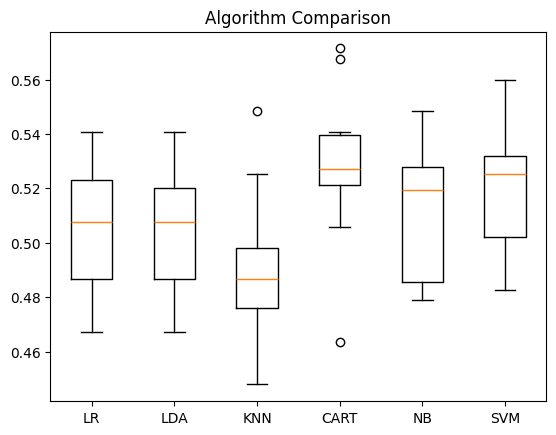

In [117]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# оцениваем модель на каждой итерации
results = []
names = []

for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()


training model and make a prediction

In [118]:
model =  KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

pred =  model.predict(X_test)

metrics.accuracy_score(y_test, pred)


0.5092592592592593

In [119]:
d1, d2 = input(), input()

a = lb.transform([d1, d2])

pred = model.predict([a])
print(*pred)


2
